In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import VGG16
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
# 加载预训练的VGG16模型
model = VGG16(weights='imagenet', include_top=False, input_shape=(112, 224, 3))

# 准备图像数据并提取特征
image_folder = 'C:/Users/chengxin/Desktop/5/LL_cluster'
image_filenames = os.listdir(image_folder)
images = []
for filename in image_filenames:
    img = cv2.imread(os.path.join(image_folder, filename))
    img = cv2.resize(img, (224, 112))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # 归一化
    features = model.predict(img)
    images.append(features.flatten())

X = np.array(images)

1/1 [==============================] - 0s 48ms/step


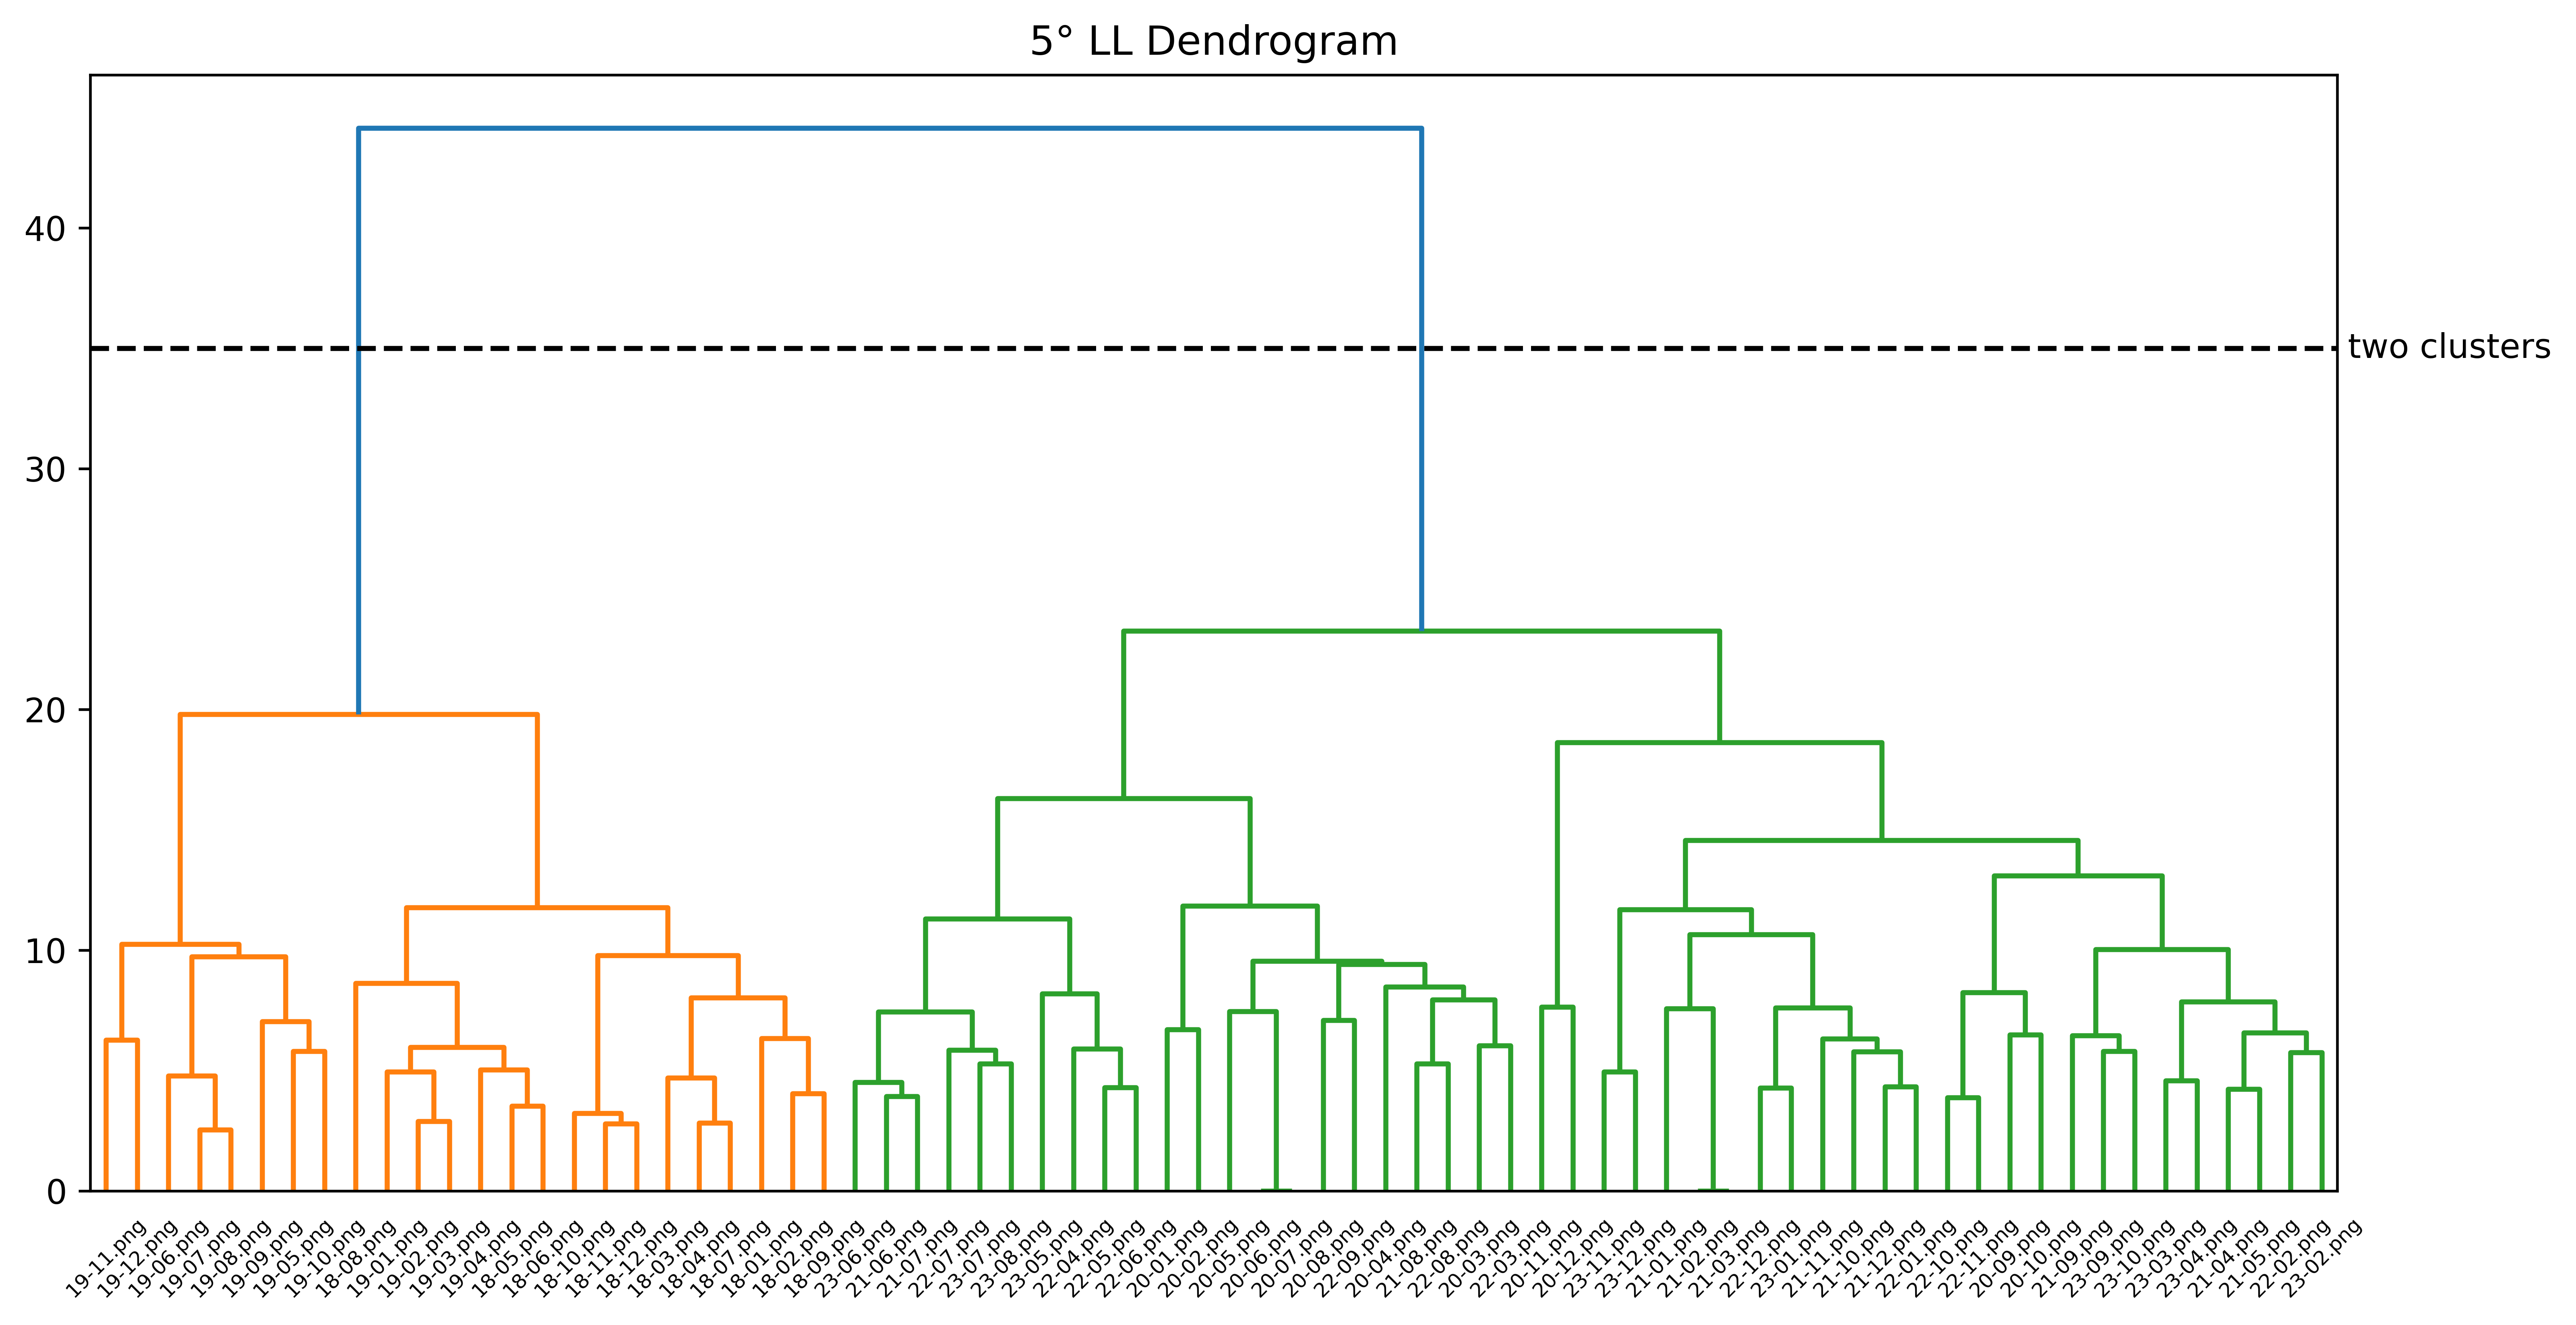

Image 18-01.png is in Cluster 2
Image 18-02.png is in Cluster 2
Image 18-03.png is in Cluster 2
Image 18-04.png is in Cluster 2
Image 18-05.png is in Cluster 2
Image 18-06.png is in Cluster 2
Image 18-07.png is in Cluster 2
Image 18-08.png is in Cluster 2
Image 18-09.png is in Cluster 2
Image 18-10.png is in Cluster 2
Image 18-11.png is in Cluster 2
Image 18-12.png is in Cluster 2
Image 19-01.png is in Cluster 2
Image 19-02.png is in Cluster 2
Image 19-03.png is in Cluster 2
Image 19-04.png is in Cluster 2
Image 19-05.png is in Cluster 2
Image 19-06.png is in Cluster 2
Image 19-07.png is in Cluster 2
Image 19-08.png is in Cluster 2
Image 19-09.png is in Cluster 2
Image 19-10.png is in Cluster 2
Image 19-11.png is in Cluster 2
Image 19-12.png is in Cluster 2
Image 20-01.png is in Cluster 2
Image 20-02.png is in Cluster 1
Image 20-03.png is in Cluster 1
Image 20-04.png is in Cluster 1
Image 20-05.png is in Cluster 1
Image 20-06.png is in Cluster 1
Image 20-07.png is in Cluster 1
Image 20

In [12]:
# 使用PCA降维
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# 聚类数据
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 绘制树状图
linkage_matrix = linkage(X_pca, method='ward')
plt.figure(figsize=(12, 6), dpi = 600)
dendrogram(linkage_matrix, labels=image_filenames, orientation='top')

#在树中标记划分成两个簇或三个簇的位置
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [35, 35], '--', c='k')
#ax.plot(bounds, [18, 18], '--', c='k')

ax.text(bounds[1], 35, ' two clusters', va='center', fontdict={'size': 10})
#ax.text(bounds[1], 18, ' three clusters', va='center', fontdict={'size': 10})
plt.title('5° LL Dendrogram')
plt.xticks(rotation=90)  # 适当旋转标签以避免重叠
plt.show()


# 输出聚类结果
for i, cluster_label in enumerate(clusters):
    print(f"Image {image_filenames[i]} is in Cluster {cluster_label+1}")

C:\Users\chengxin\AppData\Local\Temp\ipykernel_18204\3798872022.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


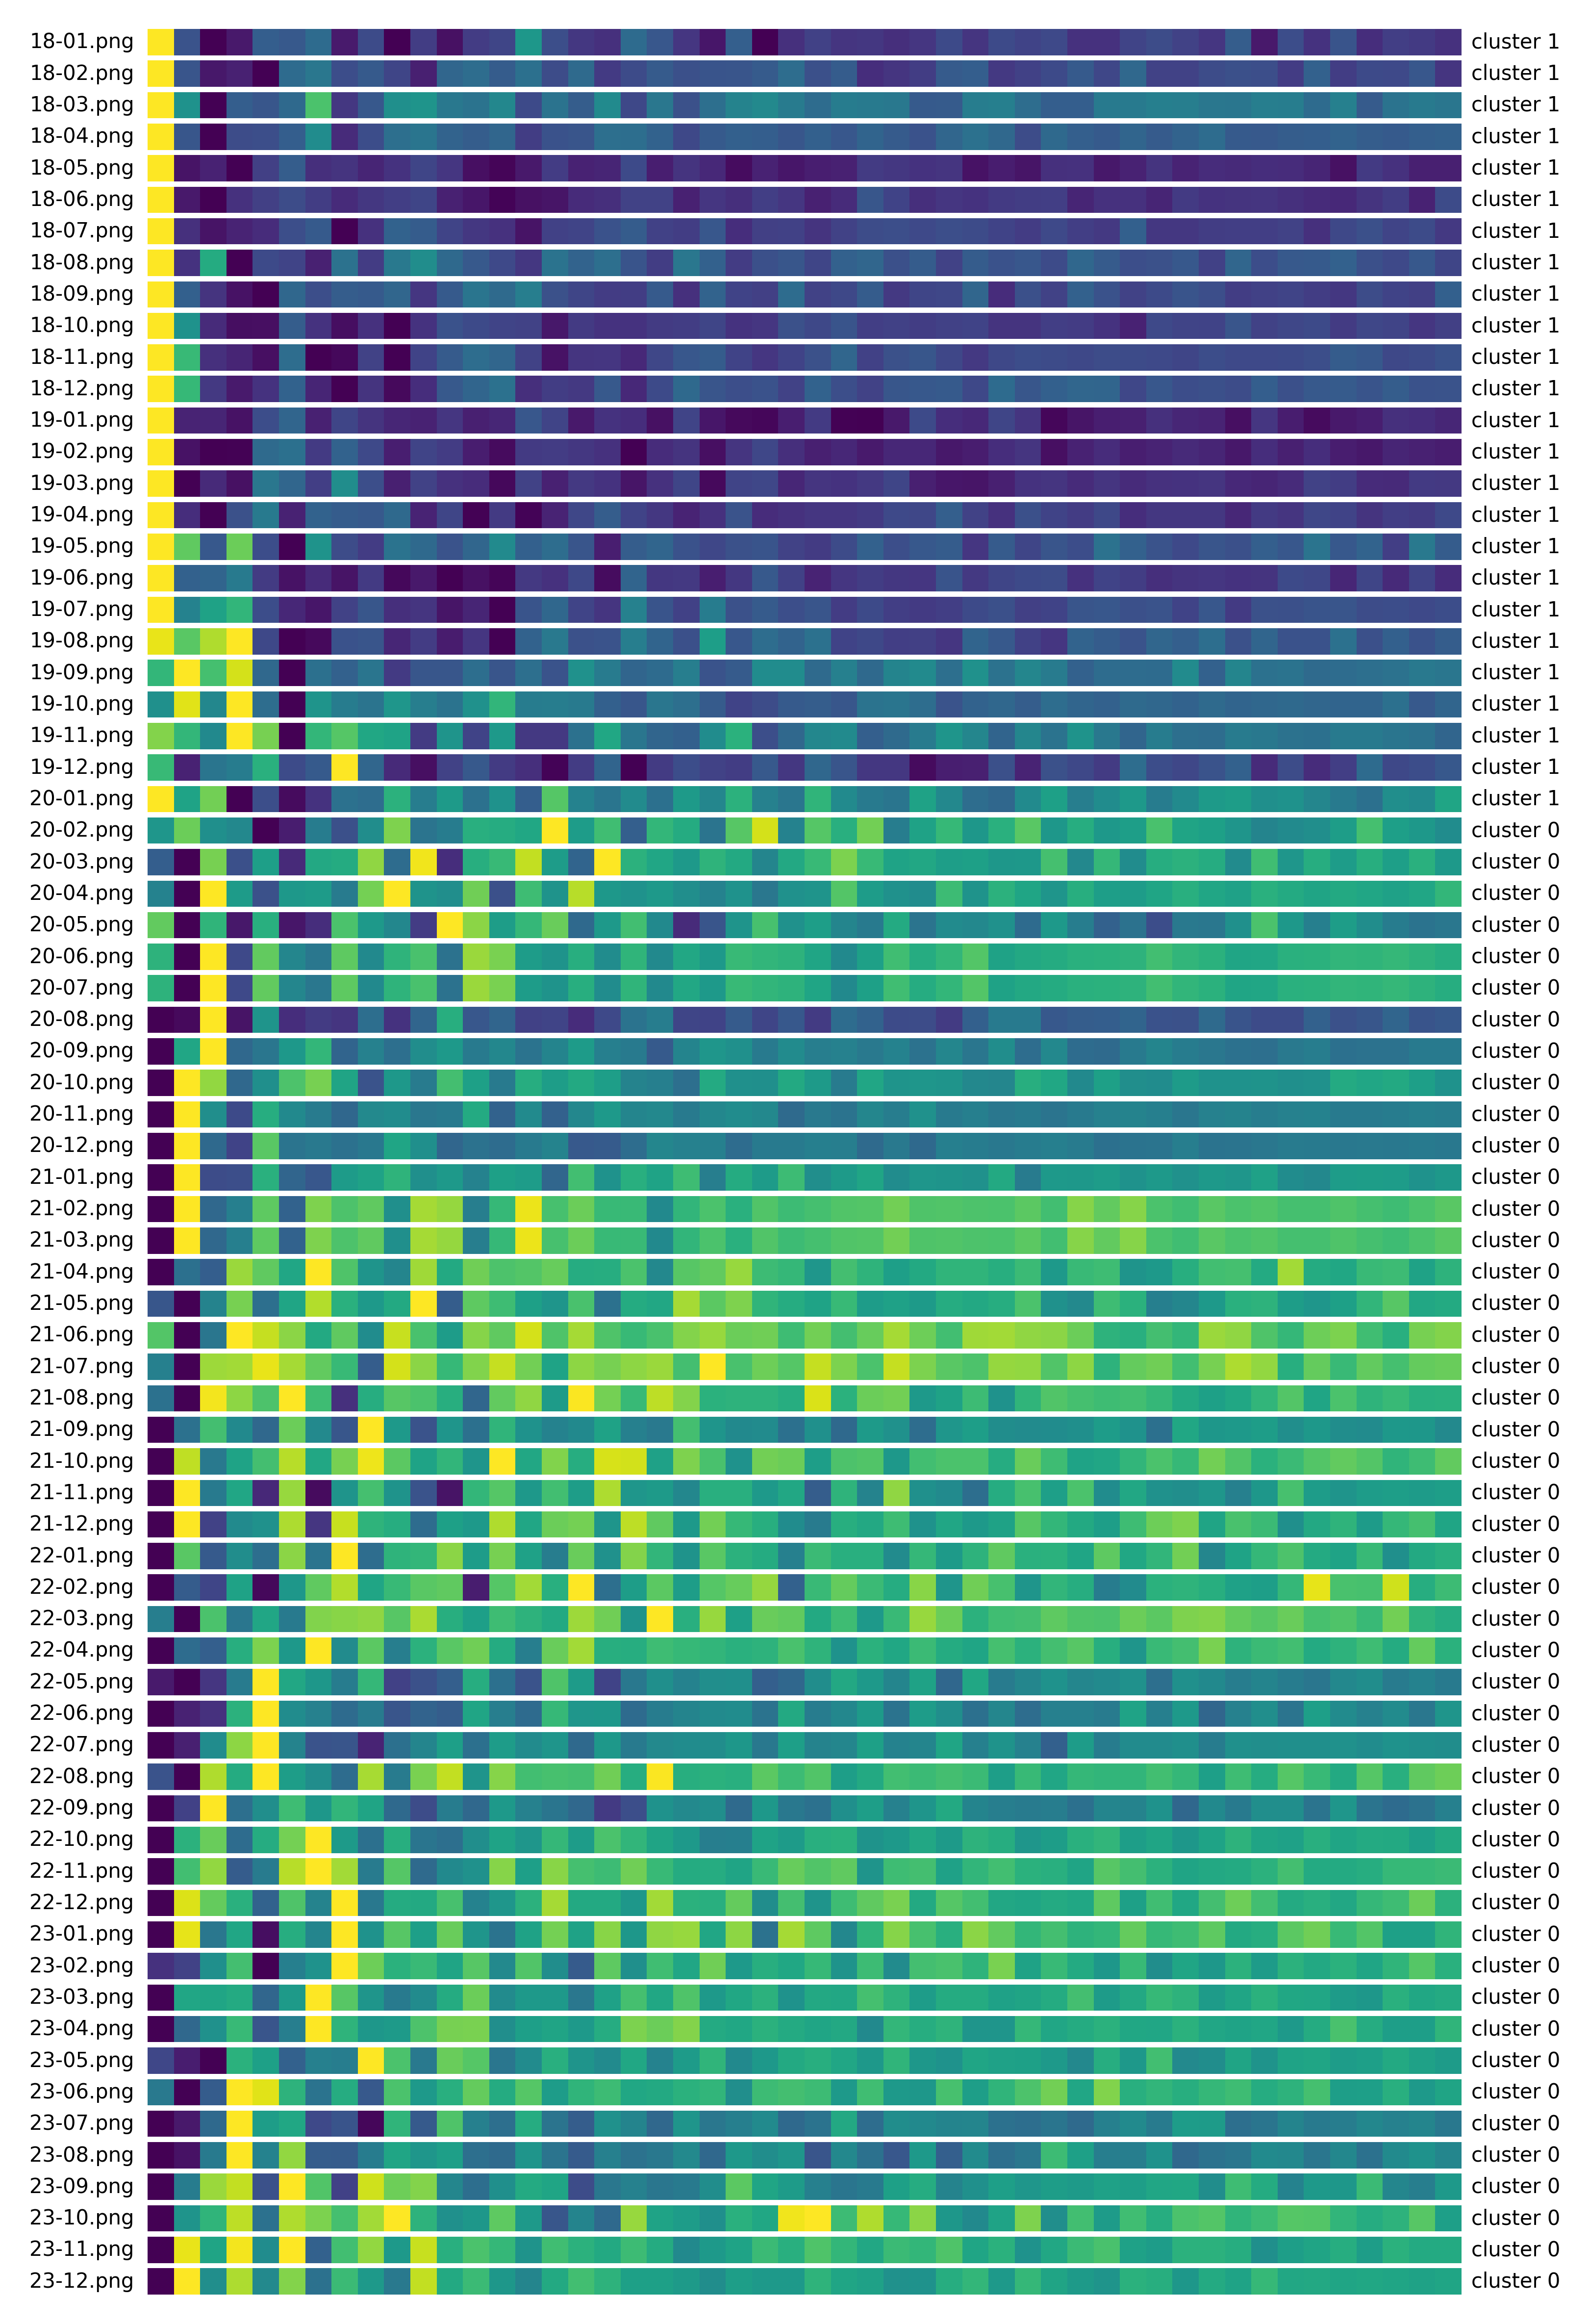

In [13]:
# Display all clustered feature maps
fig, ax = plt.subplots(len(clusters), figsize=(10, 10), dpi =600)
    
for i, cluster_num in enumerate(clusters):
    feature_map = X_pca[i].reshape(1, -1)
    ax[i].imshow(feature_map, cmap='viridis') 
#     ax[i].text(1.08, 0.9, f'cluster {cluster_num}', color = 'black', horizontalalignment='right', verticalalignment='top', 
#                transform=ax[i].transAxes, fontsize=5, fontweight='bold')  
#     ax[i].text(-0.095, 0.9, f'{image_filenames[i]}', color='black', horizontalalignment='left', verticalalignment='top', 
#                transform=ax[i].transAxes, fontsize=5, fontweight='bold') 
    ax[i].text(1.075, 0.9, f'cluster {cluster_num}', color = 'black', horizontalalignment='right', verticalalignment='top', 
               transform=ax[i].transAxes, fontsize=5)  
    ax[i].text(-0.09, 0.9, f'{image_filenames[i]}', color='black', horizontalalignment='left', verticalalignment='top', 
               transform=ax[i].transAxes, fontsize=5)
    ax[i].axis('off')

plt.tight_layout()
plt.show()